In [1]:
import pandas as pd

# Pandas - DataStrucutures
- __Series__ - 1 DImension homogeneous array, sizeimmutable.
- __Data Frame__ - 2 Dimension size-mutable tabular structure with potentially heterogeneously typed columns.
- __Panel__ - 3 Dimension size-mutable array.
- DataFrame is a container of Series, Panel is a container of DataFrame.
- All Pandas data structures are value mutable (can be changed) and except Series all are size mutable. Series is size immutable.

# Pandas - Series

### pandas.Series( data, index, dtype, copy)
- __data__ - takes various forms like ndarray, list, dictionary,constants
- __index__ - Index values must be unique and hashable, same length as data. Default np.arrange(n) if no index is passed.
- __dtype__ - is for data type. If None, data type will be inferred
- __copy__ - Copy data. Default False

In [3]:
#Creating Empty Series
s = pd.Series()
print(s)

Series([], dtype: float64)


### Create a Series from ndarray
- If data is an ndarray, then index passed must be of the same length. If no index is passed, then by default index will be __range(n)__ where __n__ is array length, i.e., __[0,1,2,3…. range(len(array))-1]__.

In [4]:
import numpy as np
array = np.arange(9)

s = pd.Series(array)
print(s)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int32


In [7]:
# Lets Specify Index
import numpy as np
array = np.arange(9)

s = pd.Series(array,np.arange(10,19))
print(s)

# We passed the index values here. Now we can see the customized indexed values in the output.

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
dtype: int32


### Create a Series from dict
- A __dict__ can be passed as input and if no index is specified, then the dictionary keys are taken in a sorted order to construct index. If __index__ is passed, the values in data corresponding to the labels in the index will be pulled out.

In [9]:
data = {'a' : 0., 'b' : 1., 'c' : 2.}

s = pd.Series(data)

print(s)
#Observe − Dictionary keys are used to construct index.

a    0.0
b    1.0
c    2.0
dtype: float64


In [11]:
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data,index=['b','c','d','a'])
print(s)

#Observe − Index order is persisted and the missing element is filled with NaN (Not a Number).

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


### Create a Series from Scalar
- If data is a scalar value, an index must be provided. The value will be repeated to match the length of __index__

In [12]:
s = pd.Series(5, index=[0, 1, 2, 3])
print(s)

0    5
1    5
2    5
3    5
dtype: int64


### Accessing Data from Series with Position, Slicing, Index(Label)

In [17]:
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s)
print('\n')

print(s[3]) # Accessinge Data with Position
print('\n')

print(s['b']) # Accessing Data with Label
print('\n')

print(s[3:]) # Access from the 3rd index
print('\n')

print(s[:3]) # Access up to last 3 indexes
print('\n')

print(s[-3:])# Access last 3 indexes

a    1
b    2
c    3
d    4
e    5
dtype: int64


4


2


d    4
e    5
dtype: int64


a    1
b    2
c    3
dtype: int64


c    3
d    4
e    5
dtype: int64


# Pandas - DataFrame

### pandas.DataFrame( data, index, columns, dtype, copy)
- __data__ - takes various forms like __ndarray__, __series__, __map__, __lists__, __dict__, __constants__ and also another __DataFrame__
- __index__ - For the row labels, the Index to be used for the resulting frame is Optional Default _np.arrange(n)_ if no index is passed.
- __columns__ - For column labels, the optional default syntax is - _np.arrange(n)_. This is only true if no index is passed.
- __dtype__ - Data type of each column.
- __copy__ - This command (or whatever it is) is used for copying of data, if the default is False.

In [18]:
# Creating Empty DataFrame

df = pd.DataFrame()

print(df)

Empty DataFrame
Columns: []
Index: []


### Creating a DataFrame from __Lists__
- The DataFrame can be created using a single list or a list of lists.

In [19]:
data = [10,11,12,13,14]

df = pd.DataFrame(data)

print(df)

    0
0  10
1  11
2  12
3  13
4  14


In [24]:
data = [['Alex',10],['Bob',12],['Clarke',13]]

df = pd.DataFrame(data)
print(df)
print('\n')

df_new = pd.DataFrame(data, columns=['Name','Age'], dtype=float) #Creating column names
print(df_new)

        0   1
0    Alex  10
1     Bob  12
2  Clarke  13


     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


### Create a DataFrame from Dict of ndarrays / Lists
- All the ndarrays must be of same length. If index is passed, then the length of the index should equal to the length of the arrays.<br>If no index is passed, then by default, index will be range(n), where n is the array length.

In [27]:
Name_List = ['Tom', 'Jack', 'Steve', 'Ricky']
Age_List = [28,34,29,42]
data_dict = {'Name': Name_List, 'Age':Age_List}

df = pd.DataFrame(data_dict)
print(df)

# The dictionary keys are by default taken as column names.

    Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42


In [26]:
Name_List = ['Tom', 'Jack', 'Steve', 'Ricky']
Age_List = [28,34,29,42]
data_dict = {'Name': Name_List, 'Age':Age_List}

df = pd.DataFrame(data_dict, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


### Create a DataFrame from List of Dicts
- List of Dictionaries can be passed as input data to create a DataFrame. The __dictionary keys__ are by default taken as __column names__.

In [28]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)

print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


In [30]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]

#With two column indices, values same as dictionary keys
df1 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b'])

#With two column indices with one index with other name
df2 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b1'])

print(df1)
print('\n')
print(df2)

        a   b
first   1   2
second  5  10


        a  b1
first   1 NaN
second  5 NaN


### Create a DataFrame from Dict of Series
- Dictionary of Series can be passed to form a DataFrame. The resultant index is the union of all the series indexes passed.

In [33]:
data = {'Name': pd.Series(['Shri','Harsha'],index=['a', 'b']), 'Age': pd.Series([10,11,12],index=['a', 'b', 'c'])}

df = pd.DataFrame(data)
print(df)

     Name  Age
a    Shri   10
b  Harsha   11
c     NaN   12


### Column Selection

In [35]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

print(df)
print('\n')

print(df['two'])

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


a    1
b    2
c    3
d    4
Name: two, dtype: int64


### Column Addition

In [38]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print(df)
print('\n')

df['three'] = pd.Series([10,20,30], index=['a', 'b', 'c'])

print(df)
print('\n')

df['four'] = df['one']+df['three']
print(df)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN


   one  two  three  four
a  1.0    1   10.0  11.0
b  2.0    2   20.0  22.0
c  3.0    3   30.0  33.0
d  NaN    4    NaN   NaN


### Column Deletion

In [41]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']), 
   'three' : pd.Series([10,20,30], index=['a','b','c'])}

df = pd.DataFrame(d)
print(df)
print('\n')

#Using del function
del(df['two'])
print(df)
print('\n')

# Using Pandas pop dataframe function

df.pop('three')
print(df)
print('\n')

   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN


   one  three
a  1.0   10.0
b  2.0   20.0
c  3.0   30.0
d  NaN    NaN


   one
a  1.0
b  2.0
c  3.0
d  NaN




### Row Selection

In [6]:
# Selection by Label
data_dict = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(data_dict)
print(df)
print('\n')

print(df.loc['c'])

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


one    3.0
two    3.0
Name: c, dtype: float64


In [7]:
data_dict = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(data_dict)
print(df)
print('\n')

print(df.iloc[3])

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


one    NaN
two    4.0
Name: d, dtype: float64


### Slice Rows
- Slicing is possible only for rows, not for coulmns

In [8]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print(df)
print('\n')

print(df[2:3]) 

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


   one  two
c  3.0    3


### Addition of Rows
- Add new rows to a DataFrame using the __append__ function. This function will __append__ the rows at the end.

In [11]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])
print(df)
print('\n')
df = df.append(df2) # Append the new dataframe
print(df)

   a  b
0  1  2
1  3  4


   a  b
0  1  2
1  3  4
0  5  6
1  7  8


### Deletion of Rows
- Use index label to delete or drop rows from a DataFrame. If label is duplicated, then multiple rows will be dropped.

In [2]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)
print(df)
print('\n')

df =  df.drop(0)
print(df)

   a  b
0  1  2
1  3  4
0  5  6
1  7  8


   a  b
1  3  4
1  7  8


# Panel
The names for the 3 axes are intended to give some semantic meaning to describing operations involving panel data. They are:
- __items__ − axis 0, each item corresponds to a DataFrame contained inside.
- __major_axis__ − axis 1, it is the index (rows) of each of the DataFrames.
- __minor_axis__ − axis 2, it is the columns of each of the DataFrames.

### Creating the Panel
#### pandas.Panel(data, items, major_axis, minor_axis, dtype, copy)
- __data__ ----> Data takes various forms like ndarray, series, map, lists, dict, constants and also another DataFrame
- __items__ ----> axis=0
- __major_axis__ ----> axis=1
- __minor_axis__ ----> axis=2
- __dtype__ ---->	Data type of each column
- __copy__ ----> Copy data. Default, false

# Basic Functionality

### Series Basic Functionality

In [5]:
import numpy as np
s = pd.Series(np.random.randn(4))

In [7]:
print(s.axes) #Returns a list of the row axis labels

[RangeIndex(start=0, stop=4, step=1)]


In [9]:
print(s.empty) #Returns the Boolean value saying whether the Object is empty or not

False


In [11]:
print(s.ndim) #Returns the number of dimensions of the object. By definition, a Series is a 1D data structure, so it returns 1

1


In [15]:
print(s.size) #Returns the size(length) of the series
print('\n')
print(len(s))

4


4


In [18]:
print(s.values) #Returns the actual data in the series as an array

[-0.31488133  0.10406499  1.28126161  0.16232898]


In [20]:
print(s.head(2)) #head() returns the first n rows(observe the index values). The default number of elements to display is five, but you may pass a custom number.

0   -0.314881
1    0.104065
dtype: float64


In [22]:
print(s.tail(2)) #tail() returns the last n rows(observe the index values). The default number of elements to display is five, but you may pass a custom number.

2    1.281262
3    0.162329
dtype: float64


### DataFrame Basic Functionality

In [28]:
data = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}
df = pd.DataFrame(data)
print(df)

    Name  Age  Rating
0    Tom   25    4.23
1  James   26    3.24
2  Ricky   25    3.98
3    Vin   23    2.56
4  Steve   30    3.20
5  Smith   29    4.60
6   Jack   23    3.80


In [29]:
print(df.T) #Returns the transpose of the DataFrame. The rows and columns will interchange.

           0      1      2     3      4      5     6
Name     Tom  James  Ricky   Vin  Steve  Smith  Jack
Age       25     26     25    23     30     29    23
Rating  4.23   3.24   3.98  2.56    3.2    4.6   3.8


In [31]:
print(df.axes) #Returns the list of row axis labels and column axis labels.

[RangeIndex(start=0, stop=7, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]


In [38]:
print(df.dtypes) #Returns the data type of each column.

Name       object
Age         int64
Rating    float64
dtype: object


In [40]:
print(df.empty) #Returns the Boolean value saying whether the Object is empty or not; True indicates that the object is empty.

False


In [42]:
print(df.ndim) # Returns the number of dimensions of the object. By definition, DataFrame is a 2D object.

2


In [44]:
print(df.shape) #Returns a tuple representing the dimensionality of the DataFrame. Tuple (a,b), where a represents the number of rows and b represents the number of columns.

(7, 3)


In [46]:
print(df.size)#Returns the number of elements in the DataFrame.

21


In [48]:
print(df.values) #Returns the actual data in the DataFrame as an NDarray

[['Tom' 25 4.23]
 ['James' 26 3.24]
 ['Ricky' 25 3.98]
 ['Vin' 23 2.56]
 ['Steve' 30 3.2]
 ['Smith' 29 4.6]
 ['Jack' 23 3.8]]


In [49]:
print(df.head()) #To view a small sample of a DataFrame object, use the head() and tail() methods. head() returns the first n rows (observe the index values). The default number of elements to display is 5, but you may pass a custom number.

    Name  Age  Rating
0    Tom   25    4.23
1  James   26    3.24
2  Ricky   25    3.98
3    Vin   23    2.56
4  Steve   30    3.20


In [51]:
print(df.tail()) #tail() returns the last n rows (observe the index values). The default number of elements to display is 5, but you may pass a custom number.

    Name  Age  Rating
2  Ricky   25    3.98
3    Vin   23    2.56
4  Steve   30    3.20
5  Smith   29    4.60
6   Jack   23    3.80


# Descriptive Statistics

In [53]:
data = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}
df = pd.DataFrame(data)
print(df)

    Name  Age  Rating
0    Tom   25    4.23
1  James   26    3.24
2  Ricky   25    3.98
3    Vin   23    2.56
4  Steve   30    3.20
5  Smith   29    4.60
6   Jack   23    3.80


In [56]:
print(df.sum()) #Returns the sum of the values for the requested axis. By default, axis is index (axis=0).
#Each individual column is added individually (Strings are appended)
print('\n')
print(df.sum(axis=1))

Name      TomJamesRickyVinSteveSmithJack
Age                                  181
Rating                             25.61
dtype: object


0    29.23
1    29.24
2    28.98
3    25.56
4    33.20
5    33.60
6    26.80
dtype: float64


In [58]:
print(df.mean()) #Returns the average value

Age       25.857143
Rating     3.658571
dtype: float64


In [59]:
print(df.std())

Age       2.734262
Rating    0.698628
dtype: float64


In [60]:
print(df.count())

Name      7
Age       7
Rating    7
dtype: int64


In [61]:
print(df.median())

Age       25.0
Rating     3.8
dtype: float64


In [63]:
print(df.mode())

    Name   Age  Rating
0   Jack  23.0    2.56
1  James  25.0    3.20
2  Ricky   NaN    3.24
3  Smith   NaN    3.80
4  Steve   NaN    3.98
5    Tom   NaN    4.23
6    Vin   NaN    4.60


In [64]:
print(df.min())

Name      Jack
Age         23
Rating    2.56
dtype: object


In [65]:
print(df.max())

Name      Vin
Age        30
Rating    4.6
dtype: object


In [66]:
print(df.abs())

TypeError: bad operand type for abs(): 'str'

In [67]:
print(df.prod())

Age       7.478738e+09
Rating    7.810877e+03
dtype: float64


In [68]:
print(df.cumsum())#cumulative sum

                             Name  Age Rating
0                             Tom   25   4.23
1                        TomJames   51   7.47
2                   TomJamesRicky   76  11.45
3                TomJamesRickyVin   99  14.01
4           TomJamesRickyVinSteve  129  17.21
5      TomJamesRickyVinSteveSmith  158  21.81
6  TomJamesRickyVinSteveSmithJack  181  25.61


In [69]:
print(df.cumprod())

TypeError: can't multiply sequence by non-int of type 'str'

#### Note − Since DataFrame is a Heterogeneous data structure. Generic operations don’t work with all functions.

- Functions like __sum()__, __cumsum()__ work with both numeric and character (or) string data elements without any error. Though n practice, character aggregations are never used generally, these functions do not throw any exception.
- Functions like __abs()__, __cumprod()__ throw exception when the DataFrame contains character or string data because such operations cannot be performed.

### Summarizing Data

In [74]:
print(df.describe()) #Returns Dataframe

             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000


This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns. __'include'__ is the argument which is used to pass necessary information regarding what columns need to be considered for summarizing. Takes the list of values; by default, 'number'.

- __object__ − Summarizes String columns
- __number__ − Summarizes Numeric columns
- __all__ − Summarizes all columns together (Should not pass it as a list value)

In [75]:
print(df.describe(include='object'))

        Name
count      7
unique     7
top     Jack
freq       1


In [76]:
print(df.describe(include='number'))

             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000


In [77]:
print(df.describe(include='all'))

        Name        Age    Rating
count      7   7.000000  7.000000
unique     7        NaN       NaN
top     Jack        NaN       NaN
freq       1        NaN       NaN
mean     NaN  25.857143  3.658571
std      NaN   2.734262  0.698628
min      NaN  23.000000  2.560000
25%      NaN  24.000000  3.220000
50%      NaN  25.000000  3.800000
75%      NaN  27.500000  4.105000
max      NaN  30.000000  4.600000


# Function Application 

To apply your own or another library’s functions to Pandas objects, you should be aware of the three important methods. The methods have been discussed below. The appropriate method to use depends on whether your function expects to operate on an entire DataFrame, row- or column-wise, or element wise.

- Table wise Function Application: pipe()
- Row or Column Wise Function Application: apply()
- Element wise Function Application: applymap()

In [9]:
import numpy as np

def adder(ele1,ele2):
   return ele1+ele2

df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print(df)
df = df.pipe(adder,2) #Dataframe Wise
print(df)
print('\n')
print(df.apply(np.mean))
print('\n')
print(df.apply(np.mean,axis = 1)) #Row wise
print('\n')
print(df.apply(np.mean,axis = 0)) #Column wise
print('\n')
print(df.applymap(lambda x:x*100)) #Element wise

       col1      col2      col3
0 -0.298356  1.819500  0.232934
1 -2.141863 -0.315050  0.485152
2 -0.909651  1.366816  0.266045
3  0.051716 -1.373822  1.017764
4  1.106950  0.542309 -1.611644
       col1      col2      col3
0  1.701644  3.819500  2.232934
1 -0.141863  1.684950  2.485152
2  1.090349  3.366816  2.266045
3  2.051716  0.626178  3.017764
4  3.106950  2.542309  0.388356


col1    1.561759
col2    2.407951
col3    2.078050
dtype: float64


0    2.584693
1    1.342746
2    2.241070
3    1.898553
4    2.012538
dtype: float64


col1    1.561759
col2    2.407951
col3    2.078050
dtype: float64


         col1        col2        col3
0  170.164382  381.950004  223.293428
1  -14.186264  168.495010  248.515184
2  109.034920  336.681607  226.604501
3  205.171647   62.617836  301.776407
4  310.694969  254.230854   38.835630


# Reindexing
Reindexing changes the row labels and column labels of a DataFrame. To reindex means to conform the data to match a given set of labels along a particular axis.

Multiple operations can be accomplished through indexing like −

- Reorder the existing data to match a new set of labels.

- Insert missing value (NA) markers in label locations where no data for the label existed.

In [10]:
import numpy as np

N=20

df = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=N-1,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),
   'D': np.random.normal(100, 10, size=(N)).tolist()
})
print(df)

            A     x         y       C           D
0  2016-01-01   0.0  0.757669  Medium   84.281649
1  2016-01-02   1.0  0.821316  Medium  106.457603
2  2016-01-03   2.0  0.664407  Medium   93.259536
3  2016-01-04   3.0  0.320490  Medium  104.235476
4  2016-01-05   4.0  0.736990  Medium  104.092506
5  2016-01-06   5.0  0.466542    High  107.355016
6  2016-01-07   6.0  0.591070  Medium   98.390755
7  2016-01-08   7.0  0.441446    High  105.282142
8  2016-01-09   8.0  0.804507  Medium  100.591906
9  2016-01-10   9.0  0.065743  Medium  118.679485
10 2016-01-11  10.0  0.154795    High   97.677474
11 2016-01-12  11.0  0.923391  Medium  100.083590
12 2016-01-13  12.0  0.322632    High  100.424788
13 2016-01-14  13.0  0.174743    High  115.027743
14 2016-01-15  14.0  0.895583     Low   99.802819
15 2016-01-16  15.0  0.110773  Medium   99.405887
16 2016-01-17  16.0  0.244039    High  116.981017
17 2016-01-18  17.0  0.840198     Low   89.472450
18 2016-01-19  18.0  0.831173    High   87.504912


In [11]:
df_reindexed = df.reindex(index=[0,2,5], columns=['A', 'C', 'B'])
print(df_reindexed)

           A       C   B
0 2016-01-01  Medium NaN
2 2016-01-03  Medium NaN
5 2016-01-06    High NaN


#### Reindex to Align with Other Objects
- You may wish to take an object and reindex its axes to be labeled the same as another object.
- __Note__ − Here, the df1 DataFrame is altered and reindexed like df2. The column names should be matched or else NAN will be added for the entire column label.

In [12]:
import numpy as np

df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
print(df1)
print('\n')
df2 = pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col3'])
print(df2)
print('\n')
df1 = df1.reindex_like(df2)
print(df1)

       col1      col2      col3
0 -1.745057  1.065676  0.494931
1  0.115237 -0.583812 -0.791352
2 -1.100612  0.082696  1.089111
3 -0.337314  0.600008 -0.621481
4 -1.353144 -1.478831  0.033871
5  0.795768  0.136982 -0.927107
6  0.584257 -0.995148 -0.576838
7  0.498210  0.953523 -0.268647
8 -1.022263  1.128703  1.388902
9 -0.539812 -0.189643  0.284068


       col1      col2      col3
0  0.012889 -0.036709  1.281354
1  0.570393  0.310735 -0.177701
2 -0.772351 -0.131164  0.155368
3  1.180512  2.942939  0.116303
4  0.280488  0.274593 -1.146620
5  0.354457 -0.815524 -1.897207
6 -0.021909  0.889226  0.663559


       col1      col2      col3
0 -1.745057  1.065676  0.494931
1  0.115237 -0.583812 -0.791352
2 -1.100612  0.082696  1.089111
3 -0.337314  0.600008 -0.621481
4 -1.353144 -1.478831  0.033871
5  0.795768  0.136982 -0.927107
6  0.584257 -0.995148 -0.576838


#### Filling while ReIndexing
reindex() takes an optional parameter method which is a filling method with values as follows −

- __pad/ffill__ − Fill values forward
- __bfill/backfill__ − Fill values backward
- __nearest__ − Fill from the nearest index values

In [13]:
import numpy as np

df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
print(df1)
print('\n')
df2 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])
print(df2)
print('\n')
print(df2.reindex_like(df1))
print('\n')
print(df2.reindex_like(df1, method= 'ffill'))

       col1      col2      col3
0  1.123808  0.682570 -1.160439
1  0.712572 -0.743828 -1.157215
2 -0.879017  0.431221 -0.010857
3  0.969457 -0.930087  1.177066
4  0.507489  1.089422  0.938518
5  1.007367 -1.614119 -0.637264


       col1      col2      col3
0 -0.520303 -0.668133 -0.336906
1  2.564716  0.868215 -0.503586


       col1      col2      col3
0 -0.520303 -0.668133 -0.336906
1  2.564716  0.868215 -0.503586
2       NaN       NaN       NaN
3       NaN       NaN       NaN
4       NaN       NaN       NaN
5       NaN       NaN       NaN


       col1      col2      col3
0 -0.520303 -0.668133 -0.336906
1  2.564716  0.868215 -0.503586
2  2.564716  0.868215 -0.503586
3  2.564716  0.868215 -0.503586
4  2.564716  0.868215 -0.503586
5  2.564716  0.868215 -0.503586


In [15]:
# Limits on Filling while Reindexing
import numpy as np

df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
print(df1)
print('\n')
df2 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])
print(df2)
print('\n')
print(df2.reindex_like(df1))
print('\n')
print(df2.reindex_like(df1, method= 'ffill',limit=2))

       col1      col2      col3
0  1.140259  1.047299 -0.200318
1  1.276610  1.840199  0.618895
2 -0.052835 -0.227479  0.381090
3  2.353892  0.299842 -1.190629
4 -0.214463  0.473533 -0.963519
5 -0.215341 -0.709957 -1.079844


       col1      col2      col3
0 -1.623279  1.037954  0.981717
1 -1.639740  0.794005  0.411001


       col1      col2      col3
0 -1.623279  1.037954  0.981717
1 -1.639740  0.794005  0.411001
2       NaN       NaN       NaN
3       NaN       NaN       NaN
4       NaN       NaN       NaN
5       NaN       NaN       NaN


       col1      col2      col3
0 -1.623279  1.037954  0.981717
1 -1.639740  0.794005  0.411001
2 -1.639740  0.794005  0.411001
3 -1.639740  0.794005  0.411001
4       NaN       NaN       NaN
5       NaN       NaN       NaN


### Renaming
##### Important
- The __rename()__ method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.
- The rename() method provides an __inplace__ named parameter, which by __default is False__ and copies the underlying data. Pass __inplace=True to rename the data in place__.

In [20]:
import numpy as np

df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
print (df1)
print('\n')
print ("After renaming the rows and columns:")
print (df1.rename(columns={'col1' : 'c1', 'col2' : 'c2'},
index = {0 : 'apple', 1 : 'banana', 2 : 'durian'}))
print('\n')
print(df1)
print('\n')
df1.rename(columns={'col1' : 'c1', 'col2' : 'c2'},
index = {0 : 'apple', 1 : 'banana', 2 : 'durian'}, inplace= True)
print(df1)

       col1      col2      col3
0  1.768486 -0.856761 -0.244558
1 -0.503099 -0.314776  0.566201
2  1.489893 -0.677620 -0.599316
3  0.377884 -0.454941 -0.399157
4 -0.460150 -0.020811 -0.013219
5 -1.435699 -1.087923 -0.143332


After renaming the rows and columns:
              c1        c2      col3
apple   1.768486 -0.856761 -0.244558
banana -0.503099 -0.314776  0.566201
durian  1.489893 -0.677620 -0.599316
3       0.377884 -0.454941 -0.399157
4      -0.460150 -0.020811 -0.013219
5      -1.435699 -1.087923 -0.143332


       col1      col2      col3
0  1.768486 -0.856761 -0.244558
1 -0.503099 -0.314776  0.566201
2  1.489893 -0.677620 -0.599316
3  0.377884 -0.454941 -0.399157
4 -0.460150 -0.020811 -0.013219
5 -1.435699 -1.087923 -0.143332


              c1        c2      col3
apple   1.768486 -0.856761 -0.244558
banana -0.503099 -0.314776  0.566201
durian  1.489893 -0.677620 -0.599316
3       0.377884 -0.454941 -0.399157
4      -0.460150 -0.020811 -0.013219
5      -1.435699 -1.087923 -

# Iteration
The behavior of basic iteration over Pandas objects depends on the type. When iterating over a __Series, it is regarded as array-like__, and basic iteration produces the values. Other data structures, like __DataFrame and Panel, follow the dict-like__ convention of iterating over the keys of the objects.

In short, basic iteration (for i in object) produces −

- __Series − values__

- __DataFrame − column labels__

- __Panel − item labels__

### Iterating a DataFrame
Iterating a DataFrame gives __column names__

In [3]:
import numpy as np
 
N=20
df = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=N-1,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),
   'D': np.random.normal(100, 10, size=(N)).tolist()
   })
print(df)
print('\n')

for col in df:
    print(col)

            A     x         y       C           D
0  2016-01-01   0.0  0.512597    High  114.118758
1  2016-01-02   1.0  0.064195  Medium  110.599907
2  2016-01-03   2.0  0.377606     Low  105.759164
3  2016-01-04   3.0  0.651644    High   85.668568
4  2016-01-05   4.0  0.729831     Low  108.315751
5  2016-01-06   5.0  0.048005  Medium   88.470734
6  2016-01-07   6.0  0.501928     Low   95.444062
7  2016-01-08   7.0  0.169318  Medium   84.872690
8  2016-01-09   8.0  0.717826     Low  104.258671
9  2016-01-10   9.0  0.643761    High   98.738904
10 2016-01-11  10.0  0.520811    High  104.831157
11 2016-01-12  11.0  0.249241     Low  114.957157
12 2016-01-13  12.0  0.334354     Low   96.953203
13 2016-01-14  13.0  0.961292  Medium  113.631693
14 2016-01-15  14.0  0.549690     Low   94.649102
15 2016-01-16  15.0  0.931154  Medium   94.887582
16 2016-01-17  16.0  0.938741    High   82.686003
17 2016-01-18  17.0  0.667328  Medium   99.876688
18 2016-01-19  18.0  0.098514     Low   94.118795


To iterate over the rows of the DataFrame, we can use the following functions −

- __iteritems() − to iterate over the (key,value) pairs__

- __iterrows() − iterate over the rows as (index,series) pairs__

- __itertuples() − iterate over the rows as namedtuples__

In [12]:
import numpy as np
 
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
print(df)
print('\n')

print(df.iteritems)
print('\n')

for key,value in df.iteritems():
    print(key,value)
    print(type(key),type(value))
    print('\n')

#Observe, each column is iterated separately as a key-value pair in a Series.

       col1      col2      col3
0  0.074681 -0.426226 -1.069612
1 -0.774250 -0.443205  2.671276
2  0.277391 -0.425407 -1.397438
3 -1.600444  1.407851  0.068613


<bound method DataFrame.iteritems of        col1      col2      col3
0  0.074681 -0.426226 -1.069612
1 -0.774250 -0.443205  2.671276
2  0.277391 -0.425407 -1.397438
3 -1.600444  1.407851  0.068613>


col1 0    0.074681
1   -0.774250
2    0.277391
3   -1.600444
Name: col1, dtype: float64
<class 'str'> <class 'pandas.core.series.Series'>


col2 0   -0.426226
1   -0.443205
2   -0.425407
3    1.407851
Name: col2, dtype: float64
<class 'str'> <class 'pandas.core.series.Series'>


col3 0   -1.069612
1    2.671276
2   -1.397438
3    0.068613
Name: col3, dtype: float64
<class 'str'> <class 'pandas.core.series.Series'>




In [14]:
import numpy as np

df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
print(df)
print('\n')
for row_index,row in df.iterrows():
    print(row_index, row)
    print(type(row_index), type(row))
    print('\n')

# Iterate over the rows

       col1      col2      col3
0  0.603627  0.570331 -0.758244
1  0.505285 -0.423692  0.059467
2  2.441589  0.319526 -1.120101
3 -0.646951 -0.829488 -0.897110


0 col1    0.603627
col2    0.570331
col3   -0.758244
Name: 0, dtype: float64
<class 'int'> <class 'pandas.core.series.Series'>


1 col1    0.505285
col2   -0.423692
col3    0.059467
Name: 1, dtype: float64
<class 'int'> <class 'pandas.core.series.Series'>


2 col1    2.441589
col2    0.319526
col3   -1.120101
Name: 2, dtype: float64
<class 'int'> <class 'pandas.core.series.Series'>


3 col1   -0.646951
col2   -0.829488
col3   -0.897110
Name: 3, dtype: float64
<class 'int'> <class 'pandas.core.series.Series'>




__Note__ − Because iterrows() iterate over the rows, it doesn't preserve the data type across the row. 0,1,2 are the row indices and col1,col2,col3 are column indices.

__itertuples()__ method will return an iterator yielding a __named tuple for each row__ in the DataFrame. The first element of the tuple will be the row’s corresponding index value, while the remaining values are the row values.

In [17]:
import numpy as np

df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
print(df)
print('\n')
for row in df.itertuples():
    print(row)
    print('\n')

       col1      col2      col3
0 -2.636707  0.217648 -0.929925
1 -0.081309 -1.703289  0.291978
2 -1.238731 -0.799297  0.740163
3  0.396726  0.126497  1.000572


Pandas(Index=0, col1=-2.6367074165907383, col2=0.21764815319362685, col3=-0.9299245635769471)


Pandas(Index=1, col1=-0.08130912055972776, col2=-1.7032894549052962, col3=0.2919776628617955)


Pandas(Index=2, col1=-1.2387305324045026, col2=-0.7992972864060112, col3=0.7401625269872649)


Pandas(Index=3, col1=0.39672622868518087, col2=0.12649675399385701, col3=1.0005719759724914)




### Note − Do not try to modify any object while iterating. __Iterating is meant for reading and the iterator returns a copy of the original object (a view)__, thus the changes will not reflect on the original object.

In [19]:
import numpy as np

df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
print(df)
print('\n')

for index, row in df.iterrows():
   row['a'] = 10
print(df)
# See No change reflected

       col1      col2      col3
0  0.035317 -1.077756  1.166138
1  0.714156  1.527332  0.545106
2  0.489707 -0.120217 -0.704183
3 -1.415261 -0.235189 -0.918121


       col1      col2      col3
0  0.035317 -1.077756  1.166138
1  0.714156  1.527332  0.545106
2  0.489707 -0.120217 -0.704183
3 -1.415261 -0.235189 -0.918121


# Sorting
There are two kinds of sorting available in Pandas. They are −

- By label
- By Actual Value

In [21]:
import numpy as np

unsorted_df=pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns=['col2','col1'])
print(unsorted_df)

       col2      col1
1 -0.492533  0.255125
4 -0.281147  0.457609
6 -1.083358  0.236330
2 -0.956279  0.628415
3 -0.185901 -1.822447
5  0.526994  0.276978
9  1.469652  1.434616
8 -0.237081 -0.177304
0  0.138270 -1.856043
7  0.580792 -3.034269


### By Label
Using the __sort_index()__ method, by passing the axis arguments and the order of sorting, DataFrame can be sorted. By default, sorting is done on row labels in ascending order.

In [27]:
sorted_df = unsorted_df.sort_index()
print(sorted_df)
print('\n')
sorted_df1 = unsorted_df.sort_index(axis = 1,ascending=False)
print(sorted_df1)

       col2      col1
0  0.138270 -1.856043
1 -0.492533  0.255125
2 -0.956279  0.628415
3 -0.185901 -1.822447
4 -0.281147  0.457609
5  0.526994  0.276978
6 -1.083358  0.236330
7  0.580792 -3.034269
8 -0.237081 -0.177304
9  1.469652  1.434616


       col2      col1
1 -0.492533  0.255125
4 -0.281147  0.457609
6 -1.083358  0.236330
2 -0.956279  0.628415
3 -0.185901 -1.822447
5  0.526994  0.276978
9  1.469652  1.434616
8 -0.237081 -0.177304
0  0.138270 -1.856043
7  0.580792 -3.034269


### By Value
Like index sorting, __sort_values()__ is the method for sorting by values. It accepts a __'by'__ argument which will use the column name of the DataFrame with which the values are to be sorted.

In [33]:
sorted_df2 = unsorted_df.sort_values(by = 'col2', ascending=False)
print(sorted_df2)

       col2      col1
9  1.469652  1.434616
7  0.580792 -3.034269
5  0.526994  0.276978
0  0.138270 -1.856043
3 -0.185901 -1.822447
8 -0.237081 -0.177304
4 -0.281147  0.457609
1 -0.492533  0.255125
2 -0.956279  0.628415
6 -1.083358  0.236330


### Sorting Algorithm
__sort_values()__ provides a provision to choose the algorithm from _mergesort, heapsort and quicksort_. __Mergesort is the only stable algorithm__.

In [34]:
sorted_df3 = unsorted_df.sort_values(by = 'col2', ascending=False, kind = 'mergesort')
print(sorted_df3)

       col2      col1
9  1.469652  1.434616
7  0.580792 -3.034269
5  0.526994  0.276978
0  0.138270 -1.856043
3 -0.185901 -1.822447
8 -0.237081 -0.177304
4 -0.281147  0.457609
1 -0.492533  0.255125
2 -0.956279  0.628415
6 -1.083358  0.236330


# Working with Text Data
- Pandas provides a set of string functions which make it easy to operate on string data. Most importantly, these functions __ignore (or exclude) missing/NaN values__.
- Applied on pandas __Series__.
- Almost, all of these methods work with Python string functions . So, __convert the Series Object to String Object__ and then perform the operation.

In [35]:
import numpy as np

df = pd.Series(['Tom', 'William Rick', 'John', 'Alber@t', np.nan, '1234','SteveSmith'])
print(df)

0             Tom
1    William Rick
2            John
3         Alber@t
4             NaN
5            1234
6      SteveSmith
dtype: object


In [36]:
print(df.str.lower())

0             tom
1    william rick
2            john
3         alber@t
4             NaN
5            1234
6      stevesmith
dtype: object


In [37]:
print(df.str.upper())

0             TOM
1    WILLIAM RICK
2            JOHN
3         ALBER@T
4             NaN
5            1234
6      STEVESMITH
dtype: object


In [38]:
print(df.str.len())

0     3.0
1    12.0
2     4.0
3     7.0
4     NaN
5     4.0
6    10.0
dtype: float64


In [40]:
print(df.str.strip())
#  strip whitespace(including newline) from each string in the Series/index from both the sides.

0             Tom
1    William Rick
2            John
3         Alber@t
4             NaN
5            1234
6      SteveSmith
dtype: object


In [46]:
print(df.str.split(''))
#Splits each string with the given pattern.

0                               [, T, o, m, ]
1    [, W, i, l, l, i, a, m,  , R, i, c, k, ]
2                            [, J, o, h, n, ]
3                   [, A, l, b, e, r, @, t, ]
4                                         NaN
5                            [, 1, 2, 3, 4, ]
6          [, S, t, e, v, e, S, m, i, t, h, ]
dtype: object


In [49]:
print(df.str.cat(sep='*******'))
#Concatenates the series/index elements with given separator.

Tom*******William Rick*******John*******Alber@t*******1234*******SteveSmith


In [51]:
print(df.str.get_dummies())
#Returns the DataFrame with One-Hot Encoded values.

   1234  Alber@t  John  SteveSmith  Tom  William Rick
0     0        0     0           0    1             0
1     0        0     0           0    0             1
2     0        0     1           0    0             0
3     0        1     0           0    0             0
4     0        0     0           0    0             0
5     1        0     0           0    0             0
6     0        0     0           1    0             0


In [52]:
print(df.str.contains('@'))

0    False
1    False
2    False
3     True
4      NaN
5    False
6    False
dtype: object


In [53]:
print(df.str.replace('@','#####'))

0             Tom
1    William Rick
2            John
3     Alber#####t
4             NaN
5            1234
6      SteveSmith
dtype: object


In [54]:
print(df.str.repeat(3))

0                               TomTomTom
1    William RickWilliam RickWilliam Rick
2                            JohnJohnJohn
3                   Alber@tAlber@tAlber@t
4                                     NaN
5                            123412341234
6          SteveSmithSteveSmithSteveSmith
dtype: object


In [56]:
print(df.str.count('Jo'))
#Returns count of appearance of pattern in each element

0    0.0
1    0.0
2    1.0
3    0.0
4    NaN
5    0.0
6    0.0
dtype: float64


In [57]:
print(df.str.startswith('T'))

0     True
1    False
2    False
3    False
4      NaN
5    False
6    False
dtype: object


In [59]:
print(df.str.endswith('t'))

0    False
1    False
2    False
3     True
4      NaN
5    False
6    False
dtype: object


In [60]:
print(df.str.find('o'))
#Returns the first position of the first occurrence of the pattern.

0    1.0
1   -1.0
2    1.0
3   -1.0
4    NaN
5   -1.0
6   -1.0
dtype: float64


In [61]:
print(df.str.findall('t'))
#Returns a list of all occurrence of the pattern.

0        []
1        []
2        []
3       [t]
4       NaN
5        []
6    [t, t]
dtype: object


In [62]:
print(df.str.swapcase())

0             tOM
1    wILLIAM rICK
2            jOHN
3         aLBER@T
4             NaN
5            1234
6      sTEVEsMITH
dtype: object


In [63]:
print(df.str.islower())

0    False
1    False
2    False
3    False
4      NaN
5    False
6    False
dtype: object


In [64]:
print(df.str.isupper())

0    False
1    False
2    False
3    False
4      NaN
5    False
6    False
dtype: object


In [65]:
print(df.str.isnumeric())

0    False
1    False
2    False
3    False
4      NaN
5     True
6    False
dtype: object


# Options and Customization

- To See and change the settings of Pandas options
[Read Here](https://www.tutorialspoint.com/python_pandas/python_pandas_options_and_customization.htm)

# Indexing and Selecting Data
- The Python and NumPy indexing operators "__[ ]__" and attribute operator "__.__"
- Since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits
- For production code, take advantage of the optimized pandas data access methods.
- Pandas now supports three types of Multi-axes indexing; the three types are mentioned in the following table −
     1. __.loc()---Label based__
     2. __.iloc()---Integer based__
     3. __.ix()---Both Label and Integer based__

### .loc()
Pandas provide various methods to have purely label based indexing. When slicing, the start bound is also included. Integers are valid labels, but they refer to the label and not the position.

__.loc()__ has multiple access methods like −
      - A single scalar label
      - A list of labels
      - A slice object
      - A Boolean array
loc takes two single/list/range operator separated by ','. The __first one indicates the row__ and the __second one indicates columns__.

In [2]:
import numpy as np

df = pd.DataFrame(np.random.randn(8, 4),index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])
print(df)

          A         B         C         D
a -0.381521 -0.496494  1.144803 -0.616850
b  0.662083  0.140973 -0.461168  1.526579
c  0.431184 -0.228879  0.675289 -1.386037
d -0.624691  0.582245  1.108452 -0.469858
e -0.537376 -1.454828 -0.452195  0.479331
f  1.282673  1.191061  0.378897 -0.028972
g -0.695548 -1.171786 -0.056170 -1.367320
h -1.507931  0.640490 -0.923155 -0.403913


In [5]:
print(df.loc[:,'A'])

a   -0.381521
b    0.662083
c    0.431184
d   -0.624691
e   -0.537376
f    1.282673
g   -0.695548
h   -1.507931
Name: A, dtype: float64


In [6]:
print(df.loc[:,['A','C']])

          A         C
a -0.381521  1.144803
b  0.662083 -0.461168
c  0.431184  0.675289
d -0.624691  1.108452
e -0.537376 -0.452195
f  1.282673  0.378897
g -0.695548 -0.056170
h -1.507931 -0.923155


In [7]:
print(df.loc[['a','b','f','h'],['A','C']])

          A         C
a -0.381521  1.144803
b  0.662083 -0.461168
f  1.282673  0.378897
h -1.507931 -0.923155


In [9]:
print(df.loc['a':'e'])

          A         B         C         D
a -0.381521 -0.496494  1.144803 -0.616850
b  0.662083  0.140973 -0.461168  1.526579
c  0.431184 -0.228879  0.675289 -1.386037
d -0.624691  0.582245  1.108452 -0.469858
e -0.537376 -1.454828 -0.452195  0.479331


In [10]:
print(df.loc['a']>0)

A    False
B    False
C     True
D    False
Name: a, dtype: bool


### .iloc()
Pandas provide various methods in order to get purely integer based indexing. Like python and numpy, these are __0-based indexing__.

The various access methods are as follows −
     - An Integer
     - A list of integers
     - A range of values

In [11]:
import numpy as np

df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
print(df)

          A         B         C         D
0  1.520176 -0.439485 -1.160865 -1.418887
1  1.058101  0.198334 -0.013358 -0.112031
2  0.664778 -0.887996  0.344530  0.098874
3 -1.900715  1.091185  1.032632 -0.207431
4  0.503197 -0.369889  0.337921  0.005728
5  0.659765  0.152777  0.177387 -0.301826
6 -0.173351  0.626826  0.479687  0.303563
7 -1.178457 -0.175760  0.939042  0.718945


In [12]:
print(df.iloc[:4])

          A         B         C         D
0  1.520176 -0.439485 -1.160865 -1.418887
1  1.058101  0.198334 -0.013358 -0.112031
2  0.664778 -0.887996  0.344530  0.098874
3 -1.900715  1.091185  1.032632 -0.207431


In [13]:
print(df.iloc[2:4,2:4])

          C         D
2  0.344530  0.098874
3  1.032632 -0.207431


In [14]:
print(df.iloc[[1,3,5],[0,2]])

          A         C
1  1.058101 -0.013358
3 -1.900715  1.032632
5  0.659765  0.177387


In [15]:
print(df.loc[1:3,:])

          A         B         C         D
1  1.058101  0.198334 -0.013358 -0.112031
2  0.664778 -0.887996  0.344530  0.098874
3 -1.900715  1.091185  1.032632 -0.207431


In [16]:
print(df.iloc[:,1:3])

          B         C
0 -0.439485 -1.160865
1  0.198334 -0.013358
2 -0.887996  0.344530
3  1.091185  1.032632
4 -0.369889  0.337921
5  0.152777  0.177387
6  0.626826  0.479687
7 -0.175760  0.939042


### .ix()
Besides pure label based and integer based, Pandas provides a hybrid method for selections and subsetting the object using the .ix() operator.

In [17]:
import numpy as np

df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
print(df)

          A         B         C         D
0 -0.632579  1.143330  0.686153  1.396014
1  0.035277  0.779817 -0.575735 -0.535616
2 -2.399663 -0.907138  0.438625 -0.204445
3  0.794171  0.060999  2.239676 -0.321423
4 -1.756524  0.184374 -0.767853 -0.460231
5 -0.453700  1.103918 -1.090454 -1.662014
6 -1.206885  0.477761 -0.067545  1.044242
7 -0.942358 -0.677514  0.896294 -1.276467


In [18]:
print(df.ix[:,'A'])

0   -0.632579
1    0.035277
2   -2.399663
3    0.794171
4   -1.756524
5   -0.453700
6   -1.206885
7   -0.942358
Name: A, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [19]:
df['A']

0   -0.632579
1    0.035277
2   -2.399663
3    0.794171
4   -1.756524
5   -0.453700
6   -1.206885
7   -0.942358
Name: A, dtype: float64

In [20]:
df[['A','B']]

,A,B
0,-0.632579,1.143330
1,0.035277,0.779817
2,-2.399663,-0.907138
3,0.794171,0.060999
4,-1.756524,0.184374
5,-0.453700,1.103918
6,-1.206885,0.477761
7,-0.942358,-0.677514


In [21]:
df[2:2]

,A,B,C,D


In [22]:
df.A #Attribute Access method

0   -0.632579
1    0.035277
2   -2.399663
3    0.794171
4   -1.756524
5   -0.453700
6   -1.206885
7   -0.942358
Name: A, dtype: float64

# Statistical Functions

### Percent_change

In [25]:
import numpy as np
s = pd.Series([1,2,3,4,5,4])
print(s.pct_change())
print('\n')
df = pd.DataFrame(np.random.randn(5, 2))
print(df.pct_change()) #Across Columns
print('\n')
print(df.pct_change(axis = 1)) # Across Rows

0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5   -0.200000
dtype: float64


          0         1
0       NaN       NaN
1 -0.681976 -0.508589
2 -5.210072  1.070440
3 -1.108832  3.322437
4 -6.192452 -0.687516


    0          1
0 NaN  -0.412223
1 NaN  -0.091767
2 NaN  -1.446653
3 NaN  16.739568
4 NaN  -2.067576


### Covariance

In [26]:
import numpy as np
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
print(s1.cov(s2))

-0.7737756496910451


In [28]:
import numpy as np
frame = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
print(frame['a'].cov(frame['b']))
print('\n')
print(frame.cov())

0.02397498228756847


          a         b         c         d         e
a  1.218058  0.023975  0.302110 -0.940370 -0.157550
b  0.023975  0.224101  0.083968 -0.022204 -0.314264
c  0.302110  0.083968  1.068551 -0.124377 -0.013052
d -0.940370 -0.022204 -0.124377  1.123793  0.125925
e -0.157550 -0.314264 -0.013052  0.125925  0.831894


### Correlation

In [30]:
import numpy as np
frame = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
print(frame['a'].corr(frame['b']))
print('\n')
print(frame.corr())

-0.26036595630100307


          a         b         c         d         e
a  1.000000 -0.260366 -0.062615  0.211094  0.215310
b -0.260366  1.000000  0.326505  0.003454 -0.409797
c -0.062615  0.326505  1.000000  0.127424 -0.857584
d  0.211094  0.003454  0.127424  1.000000  0.029565
e  0.215310 -0.409797 -0.857584  0.029565  1.000000


### Data Ranking

In [32]:
import numpy as np

s = pd.Series(np.random.np.random.randn(5), index=list('abcde'))
s['d'] = s['b'] # so there's a tie
print(s.rank())
print('\n')
print(s.rank(ascending=False))

a    1.0
b    2.5
c    4.0
d    2.5
e    5.0
dtype: float64


a    5.0
b    3.5
c    2.0
d    3.5
e    1.0
dtype: float64


# Window Functions
[Read Here](https://www.tutorialspoint.com/python_pandas/python_pandas_window_functions.htm)

# Aggregations
[Read Here](https://www.tutorialspoint.com/python_pandas/python_pandas_aggregations.htm)

# Missing Data
- __NaN__ means __Not a Number__.

In [11]:
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])
print(df)
print('\n')
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
print(df)

        one       two     three
a -0.631690  0.166584 -1.194042
c  0.508710 -2.008490 -1.334067
e  2.510929 -0.766735 -0.850976
f  0.502522  0.571518  1.569032
h  0.145425  0.244733 -0.432098


        one       two     three
a -0.631690  0.166584 -1.194042
b       NaN       NaN       NaN
c  0.508710 -2.008490 -1.334067
d       NaN       NaN       NaN
e  2.510929 -0.766735 -0.850976
f  0.502522  0.571518  1.569032
g       NaN       NaN       NaN
h  0.145425  0.244733 -0.432098


### Check for Missing Values
- __isnull()__
- __notnull()__
- Can be applied on the series and Dataframes

In [5]:
print(df['one'].isnull())

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool


In [6]:
print(df['one'].notnull())

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool


### Calculations with Missing Data
- When summing data, NA will be treated as Zero
- If the data are all NA, then the result will be NA

In [7]:
print(df['one'].sum())

1.0694701515423302


In [10]:
df1 = pd.DataFrame(index=[0,1,2,3,4,5],columns=['one','two'])
print(df1)
print('\n')
print(df1['one'].sum())

   one  two
0  NaN  NaN
1  NaN  NaN
2  NaN  NaN
3  NaN  NaN
4  NaN  NaN
5  NaN  NaN


0


### Cleaning / Filling Missing Data
- fillna() - To fill with a scalar value
- pad/fill - Fill methods Forward
- bfill/backfill - Fill methods Backward

In [12]:
print(df.fillna(0))

        one       two     three
a -0.631690  0.166584 -1.194042
b  0.000000  0.000000  0.000000
c  0.508710 -2.008490 -1.334067
d  0.000000  0.000000  0.000000
e  2.510929 -0.766735 -0.850976
f  0.502522  0.571518  1.569032
g  0.000000  0.000000  0.000000
h  0.145425  0.244733 -0.432098


In [13]:
print(df.fillna(method='ffill'))

        one       two     three
a -0.631690  0.166584 -1.194042
b -0.631690  0.166584 -1.194042
c  0.508710 -2.008490 -1.334067
d  0.508710 -2.008490 -1.334067
e  2.510929 -0.766735 -0.850976
f  0.502522  0.571518  1.569032
g  0.502522  0.571518  1.569032
h  0.145425  0.244733 -0.432098


In [14]:
print(df.fillna(method='backfill'))

        one       two     three
a -0.631690  0.166584 -1.194042
b  0.508710 -2.008490 -1.334067
c  0.508710 -2.008490 -1.334067
d  2.510929 -0.766735 -0.850976
e  2.510929 -0.766735 -0.850976
f  0.502522  0.571518  1.569032
g  0.145425  0.244733 -0.432098
h  0.145425  0.244733 -0.432098


### Drop Missing Values
- If you want to simply exclude the missing values, then use the __dropna__ function along with the axis argument. By default, axis=0, i.e., along row, which means that if any value within a row is NA then the whole row is excluded.

In [15]:
print(df.dropna())

        one       two     three
a -0.631690  0.166584 -1.194042
c  0.508710 -2.008490 -1.334067
e  2.510929 -0.766735 -0.850976
f  0.502522  0.571518  1.569032
h  0.145425  0.244733 -0.432098


In [16]:
print(df.dropna(axis=1))

Empty DataFrame
Columns: []
Index: [a, b, c, d, e, f, g, h]


### Replace Missing (or) Generic Values
- Many times, we have to replace a generic value with some specific value. We can achieve this by applying the replace method.
- Replacing NA with a scalar value is equivalent behavior of the fillna() function.

In [2]:
df = pd.DataFrame({'one':[10,20,30,40,50,2000], 'two':[1000,0,30,40,50,60]})
print(df)
print('\n')
print(df.replace({1000:10,2000:60}))

    one   two
0    10  1000
1    20     0
2    30    30
3    40    40
4    50    50
5  2000    60


   one  two
0   10   10
1   20    0
2   30   30
3   40   40
4   50   50
5   60   60


# Groupby
- Any groupby operation involves one of the following operations on the original object. They are −

  - Splitting the Object

  - Applying a function

  - Combining the results

- In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

   - __Aggregation__ − computing a summary statistic

   - __Transformation__ − perform some group-specific operation

   - __Filtration__ − discarding the data with some condition

In [3]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690


In [6]:
print(df.groupby('Team'))
print('\n')

# To view the groups 

df.groupby('Team').groups

{'Devils': Int64Index([2, 3], dtype='int64'),
 'Kings': Int64Index([4, 6, 7], dtype='int64'),
 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Royals': Int64Index([9, 10], dtype='int64'),
 'kings': Int64Index([5], dtype='int64')}

In [8]:
# Group by multile columns
df.groupby(['Team','Year']).groups

{('Devils', 2014): Int64Index([2], dtype='int64'),
 ('Devils', 2015): Int64Index([3], dtype='int64'),
 ('Kings', 2014): Int64Index([4], dtype='int64'),
 ('Kings', 2016): Int64Index([6], dtype='int64'),
 ('Kings', 2017): Int64Index([7], dtype='int64'),
 ('Riders', 2014): Int64Index([0], dtype='int64'),
 ('Riders', 2015): Int64Index([1], dtype='int64'),
 ('Riders', 2016): Int64Index([8], dtype='int64'),
 ('Riders', 2017): Int64Index([11], dtype='int64'),
 ('Royals', 2014): Int64Index([9], dtype='int64'),
 ('Royals', 2015): Int64Index([10], dtype='int64'),
 ('kings', 2015): Int64Index([5], dtype='int64')}

### Iterate through Groups

In [26]:
grouped = df.groupby('Team')
for name in grouped:
    print(name)
    print('\n')

grouped = df.groupby('Year')
print(grouped)
print('\n')
for name, group in grouped:
    print(name)
    print(group)

('Devils',      Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673)


('Kings',     Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788)


('Riders',       Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690)


('Royals',       Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804)


('kings',     Team  Rank  Year  Points
5  kings     4  2015     812)




2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
   

### Select a Group
- Using the __get_group()__ method, we can select a single group.

In [27]:
grouped = df.groupby('Year')
grouped.get_group(2014)

,Team,Rank,Year,Points
0,Riders,1,2014,876
2,Devils,2,2014,863
4,Kings,3,2014,741
9,Royals,4,2014,701


### Aggregations
- An aggregated function returns a single aggregated value for each group. Once the group by object is created, several aggregation operations can be performed on the grouped data.
- An obvious one is aggregation via the aggregate or equivalent __agg()__ method 

In [29]:
import numpy as np
grouped = df.groupby('Year')
grouped['Points'].agg(np.mean)

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64

In [31]:
import numpy as np
grouped = df.groupby('Team')
grouped.agg(np.size)

,Rank,Year,Points
Team,,,
Devils,2,2,2
Kings,3,3,3
Riders,4,4,4
Royals,2,2,2
kings,1,1,1


In [32]:
import numpy as np
grouped = df.groupby('Year')
grouped['Points'].agg([np.mean,np.sum,np.std])

,mean,sum,std
Year,,,
2014,795.25,3181,87.439026
2015,769.50,3078,65.035888
2016,725.00,1450,43.840620
2017,739.00,1478,69.296465


### Transformations
- Transformation on a group or a column returns an object that is indexed the same size of that is being grouped. Thus, the transform should return a result that is the same size as that of a group chunk.

In [36]:
import numpy as np
grouped = df.groupby('Team')
score = lambda x: (x - x.mean()) / x.std()*10
grouped.transform(score)

,Rank,Year,Points
0,-15.000000,-11.618950,12.843272
1,5.000000,-3.872983,3.020286
2,-7.071068,-7.071068,7.071068
3,7.071068,7.071068,-7.071068
4,11.547005,-10.910895,-8.608621
5,NaN,NaN,NaN
6,-5.773503,2.182179,-2.360428
7,-5.773503,8.728716,10.969049
8,5.000000,3.872983,-7.705963
9,7.071068,-7.071068,-7.071068


### Filtration
- Filtration filters the data on a defined criteria and returns the subset of data. The __filter()__ function is used to filter the data.

In [37]:
df = pd.DataFrame(ipl_data)
df.groupby('Team').filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


# Merging/Joining
1. Pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL.

2. Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects −

   __pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,left_index=False, right_index=False, sort=True)__

In [38]:
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})

right = pd.DataFrame(
   {'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})

print(left)
print('\n')
print(right)

   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5


   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5


In [39]:
pd.merge(left,right,on='id')

,id,Name_x,subject_id_x,Name_y,subject_id_y
0,1,Alex,sub1,Billy,sub2
1,2,Amy,sub2,Brian,sub4
2,3,Allen,sub4,Bran,sub3
3,4,Alice,sub6,Bryce,sub6
4,5,Ayoung,sub5,Betty,sub5


In [40]:
pd.merge(left,right,on=['id','subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayoung,sub5,Betty


In [42]:
pd.merge(left,right,on='subject_id',how='left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


In [43]:
pd.merge(left,right,on='subject_id',how='right')

,id_x,Name_x,subject_id,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,4.0,Alice,sub6,4,Bryce
3,5.0,Ayoung,sub5,5,Betty
4,NaN,NaN,sub3,3,Bran


In [44]:
pd.merge(left,right,on='subject_id',how='outer')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub4,2.0,Brian
3,4.0,Alice,sub6,4.0,Bryce
4,5.0,Ayoung,sub5,5.0,Betty
5,NaN,NaN,sub3,3.0,Bran


In [45]:
pd.merge(left,right,on='subject_id',how='inner')

,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub4,2,Brian
2,4,Alice,sub6,4,Bryce
3,5,Ayoung,sub5,5,Betty


# Concatenation
- Pandas provides various facilities for easily combining together __Series__, __DataFrame__, and __Panel__ objects   
   
   __pd.concat(objs,axis=0,join='outer',join_axes=None,ignore_index=False)__

In [47]:
one = pd.DataFrame({
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5'],
   'Marks_scored':[98,90,87,69,78]},
   index=[1,2,3,4,5])

two = pd.DataFrame({
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5'],
   'Marks_scored':[89,80,79,97,88]},
   index=[1,2,3,4,5])
print(one)
print('\n')
print(two)

     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78


    Name subject_id  Marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88


In [49]:
pd.concat([one,two]) #Passing List of objects

,Name,subject_id,Marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [50]:
pd.concat([one,two],keys=['X','Y'])

Name subject_id  Marks_scored
X 1    Alex       sub1            98
  2     Amy       sub2            90
  3   Allen       sub4            87
  4   Alice       sub6            69
  5  Ayoung       sub5            78
Y 1   Billy       sub2            89
  2   Brian       sub4            80
  3    Bran       sub3            79
  4   Bryce       sub6            97
  5   Betty       sub5            88

In [54]:
pd.concat([one,two,one],ignore_index=True) #Gives new index

,Name,subject_id,Marks_scored
0,Alex,sub1,98
1,Amy,sub2,90
2,Allen,sub4,87
3,Alice,sub6,69
4,Ayoung,sub5,78
5,Billy,sub2,89
6,Brian,sub4,80
7,Bran,sub3,79
8,Bryce,sub6,97
9,Betty,sub5,88


In [53]:
# Across axis 1

pd.concat([one,two],axis=1)

,Name,subject_id,Marks_scored,Name,subject_id,Marks_scored
1,Alex,sub1,98,Billy,sub2,89
2,Amy,sub2,90,Brian,sub4,80
3,Allen,sub4,87,Bran,sub3,79
4,Alice,sub6,69,Bryce,sub6,97
5,Ayoung,sub5,78,Betty,sub5,88


### Concatenating Using append
- A useful shortcut to concat are the append instance methods on __Series__ and __DataFrame__. These methods actually predated concat. They concatenate along axis=0, namely the index

In [55]:
one.append(two)

,Name,subject_id,Marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [56]:
one.append([two,one,two])

,Name,subject_id,Marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


# Time Series
- Pandas provide a robust tool for working time with Time series data. While working with time series data, we frequently come across the following −
     - Generating sequence of time
     - Convert the time series to different frequencies
- Pandas provides a relatively compact and self-contained set of tools for performing the above tasks.

In [59]:
# Get current time
print(pd.datetime.now())

2019-09-28 23:36:21.238642


In [61]:
# Create a timestamp
print(pd.Timestamp('2019-09-28'))

2019-09-28 00:00:00


In [62]:
# convert integer or float epoch times
print(pd.Timestamp(1587687255,unit='s'))

2020-04-24 00:14:15


In [64]:
#Create a range time
pd.date_range("11:00", "13:30", freq="30min").time

array([datetime.time(11, 0), datetime.time(11, 30), datetime.time(12, 0),
       datetime.time(12, 30), datetime.time(13, 0), datetime.time(13, 30)],
      dtype=object)

In [65]:
pd.date_range("11:00", "13:30", freq="H").time

array([datetime.time(11, 0), datetime.time(12, 0), datetime.time(13, 0)],
      dtype=object)

### Converting to Timestamps
- To convert a Series or list-like object of date-like objects, for example strings, epochs, or a mixture, you can use the __to_datetime__ function. When passed, this __returns a Series__ (with the same index), while a __list-like__ is converted to a __DatetimeIndex__.
- __NaT__ means __Not a Time__ (equivalent to NaN)

In [67]:
s = pd.Series(['Jul 31, 2009','2010-01-10', None])
print(s)
print('\n')

pd.to_datetime(s)

0    Jul 31, 2009
1      2010-01-10
2            None
dtype: object




0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [68]:
pd.to_datetime(['2005/11/23', '2010.12.31', None])

DatetimeIndex(['2005-11-23', '2010-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)

# Date Functionality
- Extending the Time series, Date functionalities play major role. While working with Date data, we will frequently come across the following −
    - Generating sequence of dates
    - Convert the date series to different frequencies

In [69]:
#Create a range of dates
pd.date_range('1/1/2011', periods=5)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range('1/1/2011', periods=5,freq='M')

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31'],
              dtype='datetime64[ns]', freq='M')

In [73]:
# bdate_range() stands for business date ranges. Unlike date_range(), it excludes Saturday and Sunday.
pd.bdate_range('1/1/2011', periods=5)

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07'],
              dtype='datetime64[ns]', freq='B')

The default frequency for __date_range__ is a calendar __day__ while the default for __bdate_range__ is a __business day__.

# Timedelta
- Timedeltas are differences in times, expressed in difference units, for example, days, hours, minutes, seconds. 
- They can be both positive and negative.

In [74]:
#From String
pd.Timedelta('2 days 2 hours 15 minutes 30 seconds')

Timedelta('2 days 02:15:30')

In [75]:
#From Integer
pd.Timedelta(6,unit='h')

Timedelta('0 days 06:00:00')

In [76]:
#Data offsets such as - weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds can also be used in construction.
pd.Timedelta(days=2)

Timedelta('2 days 00:00:00')

### Operations
- You can operate on Series/ DataFrames and construct __timedelta64[ns]__ Series through subtraction operations on __datetime64[ns]__ Series, or Timestamps.

In [77]:
s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))
td = pd.Series([ pd.Timedelta(days=i) for i in range(3) ])
df = pd.DataFrame(dict(A = s, B = td))
df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [78]:
# Addition
df['C']=df['A']+df['B']
df

,A,B,C
0,2012-01-01,0 days,2012-01-01
1,2012-01-02,1 days,2012-01-03
2,2012-01-03,2 days,2012-01-05


In [79]:
# Subtraction
df['D']=df['A']-df['C']
df['E']=df['C']-df['A']
df

,A,B,C,D,E
0,2012-01-01,0 days,2012-01-01,0 days,0 days
1,2012-01-02,1 days,2012-01-03,-1 days,1 days
2,2012-01-03,2 days,2012-01-05,-2 days,2 days


# Categorical Data
- Category are a Pandas data type
- The categorical data type is useful in the following cases −
          1. A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory.

          2. The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.

         3. As a signal to other python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [3]:
# Creating a Pandas Series  with categorical values
s = pd.Series(["a","b","c","a"], dtype='category')
s
# Though we have 4 values, it still take only 3 categories

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

#### pandas.Categorical(values, categories, ordered)

In [6]:
print(type(pd.Categorical(["a","b","c","a"])))
print('\n')
pd.Categorical(["a","b","c","a"])

<class 'pandas.core.arrays.categorical.Categorical'>




[a, b, c, a]
Categories (3, object): [a, b, c]

In [8]:
pd.Categorical(['a','b','c','a','b','c','d'],['c','a','b'])

[a, b, c, a, b, c, NaN]
Categories (3, object): [c, a, b]

Here, the __second argument signifies the categories__. Thus, any value which is not present in the categories will be treated as __NaN__.

In [10]:
pd.Categorical(['a','b','c','a','b','c','d'],['c','a','b'],ordered=True)
# Logically, the order means that, b is greater than a and a is greater than c

[a, b, c, a, b, c, NaN]
Categories (3, object): [c < a < b]

In [15]:
import numpy as np
cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
df = pd.DataFrame({"cat":cat, "s":["a", "c", "c", np.nan]}) #Using the Categorical object to 
print(df)
print('\n')
print(df['cat'].describe())

   cat    s
0    a    a
1    c    c
2    c    c
3  NaN  NaN


count     3
unique    2
top       c
freq      2
Name: cat, dtype: object


In [36]:
cat = pd.Categorical(["a", "c", "c", "d"], categories=["b", "a", "c"])
series1 = pd.Series(cat)
print(series1)
print('\n')
print(cat.categories) #What are the catgories in the categorical object
print('\n')
print(series1.cat.categories) # FInding categories of the Series Object

0      a
1      c
2      c
3    NaN
dtype: category
Categories (3, object): [b, a, c]


Index(['b', 'a', 'c'], dtype='object')


Index(['b', 'a', 'c'], dtype='object')


####  To Convert a series to a categorical object you have to use "cat" attribute of the series - "series.cat"

In [37]:
print(series1)
print('\n')
print(series1.cat.add_categories('d')) #Add Categories

0      a
1      c
2      c
3    NaN
dtype: category
Categories (3, object): [b, a, c]


0      a
1      c
2      c
3    NaN
dtype: category
Categories (4, object): [b, a, c, d]


In [32]:
print(series)
print('\n')
print(series.cat.remove_categories('c'))

0      a
1      c
2      c
3    NaN
dtype: category
Categories (3, object): [b, a, c]


0      a
1    NaN
2    NaN
3    NaN
dtype: category
Categories (2, object): [b, a]


### Comparison of Categorical Data
- Comparing categorical data with other objects is possible in three cases −

         1. comparing equality (== and !=) to a list-like object (list, Series, array, ...) of the same length as the categorical data.

         2. all comparisons (==, !=, >, >=, <, and <=) of categorical data to another categorical Series, when ordered==True and the categories are the same.

        3. all comparisons of a categorical data to a scalar.
##### Categoricals can only be compared if 'categories' and their "Order" are the same.

In [43]:
s1 = pd.Series([1,2,3]).astype(dtype='category',categories=[1,3,2],ordered=True)
print(s1)
print('\n')
s2 = pd.Series([2,1,3]).astype(dtype='category',categories=[1,3,2],ordered=True)
print(s2)
print('\n')
(s1>s2)

0    1
1    2
2    3
dtype: category
Categories (3, int64): [1 < 3 < 2]


0    2
1    1
2    3
dtype: category
Categories (3, int64): [1 < 3 < 2]




C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


0    False
1     True
2    False
dtype: bool

In [40]:
s1 = pd.Series([1,2,3]).astype(dtype='category',categories=[1,3,2],ordered=True)
print(s1)
print('\n')
s2 = pd.Series([2,3,4]).astype(dtype='category',categories=[4,3,2],ordered=True)
print(s2)
print('\n')
(s1>s2)

0    1
1    2
2    3
dtype: category
Categories (3, int64): [1 < 3 < 2]


0    2
1    3
2    4
dtype: category
Categories (3, int64): [4 < 3 < 2]




C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


TypeError: Categoricals can only be compared if 'categories' are the same.

          a         b         c         d
0  0.214365  0.532354  0.999374  0.669793
1  0.811151  0.310961  0.428930  0.212069
2  0.889027  0.452843  0.693764  0.910315
3  0.403626  0.716899  0.901844  0.245753
4  0.568789  0.070680  0.410833  0.743998
5  0.120134  0.453450  0.262354  0.009764
6  0.173194  0.191077  0.301179  0.785687
7  0.259475  0.885851  0.700725  0.270897
8  0.966464  0.651783  0.329931  0.462389
9  0.695146  0.738312  0.712733  0.475142


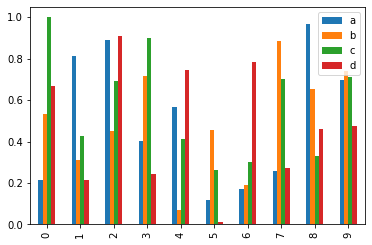

In [46]:
import numpy as np

df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
print(df)
df.plot.bar()
#df.plot()